# [ES-21AC] State and County Prisons 



---
### Professor: Victoria Robinson 
### GSI: Phillip Pierini

The goal os this project is for students to undertand that the can do social work using data. This notebook explores the incarceration tends and impacts of prison realignment in California. 

*Estimated Time: X minutes*

---

### Topics Covered
- State Prison
- County Jail 

### Table of Contents

[The Data](#sectiondata)<br>

[Context](#sectioncontext)<br>

1 - [State Prison](#section1)<br>

[Gender Divison](#subsection1)<br>
   
[Staff vs Desgin Capacity](#subsection2)<br>

2 - [County Jail](#section2)<br>

[Section 3](#subsection3)<br>

**Dependencies:**

In [1]:
from datascience import *
import numpy as np

import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


import ipywidgets as widgets


---

## 1. The Data <a id='sectiondata'></a>

In this notebook, you will use data from two sources. The CDCR (California Department of Corrections and Rehabilitation)
and the Jail Profile Survey provided by the Board of State and Community Corrections (BSCC). 

The CDCR reports the number of people in state prisons across California. On this data set, you wil find information including the capacity (staff & desgin) of each prison, and the current popualtion. This will provide with a fremework to understand prison overcrowding and the effectivenss of policy to reduce it. 

The Jail Profile Survey releases reports on data recorded by local agecies. Some of the valuable information that will find here include the total number of unsetenced and sentences males and females in each of these facilities. This data has been used to determine the needs of each of these counties when determining the distribution state bond monies, and future projections for other jail needs. 

If you are interested in learning more please visit:
[CDCR data and infromation](https://github.com/nrjones8/cdcr-population-data)

[Jail Profile Survey](http://www.bscc.ca.gov/downloads/JPSWorkbook.pdf) 

[Jail Profile Survey data](https://app.bscc.ca.gov/joq//jps/QuerySelection.asp)

---

## Context  <a id='sectioncontext'></a>

Durign the course, we have learned about the polciies of realignment, incarceration, and crime trends in California. By exploring these datasets we hope to get a clear picture of the maginitude of prison overcrowding per facility and region, and the effects of realignmnet polcies in the state ad county prisons. 

---

Below you will find a data dictionary for future reference. 


|Column Name   | Description |
|--------------|---------|
|year |Year that the data was collected  |
|month | Month that the data was collected |
|institution_name |  Abbreviated Name of the State Prison|
|population_felons | ... |
|civil_addict | ... |
|total_population | ... |
|designed_capacity | ... |
|percent_occupied | ...|
|staffed_capacity | ...|


### 1.1 Importing the Data

In [75]:
### Here we import the data from a file named `monthly_cdcr_population.csv`
### The table has the columns that are listed above.
data = Table().read_table("monthly_cdcr_population.csv")

### Removed a column from the table, because we do not need the information in our exercise.
data = data.drop("source_pdf_name")
data.sort(0)

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


---
# 2. State Prison as a Whole (general info)<a id='section1'></a>
---

Background on state prisons versus federal prisons and emphasizing the difference with jails


- California state prisons are a large part of the ...

### 2.1 How has the population size of prisons changed over time in regards to the designed capacity of a prisons?
### 2.1 Designed Capacity of the Entire System

########## The Prison Industrial Complex has created our current issue with mass incarceration. Thus far, we have learned how prisons were designed to 


Let's look at how the size of prison populations has changed over time in regards to the number of inmates the prison is designed to hold.

In [78]:
### We want to look at 3 columns from our original `data` table. We use the key word 
### select to tell it that we want this specific selection of columns in a new table.
### It keeps all the rows from the original table.
year_and_design_capacity = data.select("year", "institution_name",'designed_capacity')
year_and_design_capacity

year,institution_name,designed_capacity
1996,VSP (VALLEY SP),1980
1996,SCC (SIERRA CONSERVATION CENTER),320
1996,NCWF (NO CAL WOMEN'S FACIL),400
1996,CCWF (CENTRAL CA WOMEN'S FAC),2004
1996,"CRC (CAL REHAB CTR, WOMEN)",500
1996,CIW (CA INSTITUTION FOR WOMEN),1026
1996,WSP (WASCO SP),2484
1996,SCC (SIERRA CONSERVATION CENTER),3606
1996,SRTA (SANTA RITA CO. JAIL-RC),395
1996,RJD (RJ DONOVAN CORRECTIONAL FAC),2200


In [87]:
### This combines all the row values that have the same year, and 
### it sums the designed capacity of each prison. 
total_capacity_ca = year_and_design_capacity.group("year", sum)
total_capacity_ca

### NOTICE: the second column of the table, `institution_name_sum` 
### has no row values. This occurs, because we can not find the 
### sum of two names.

year,institution_name sum,designed_capacity sum
1996,,873676
1997,,910797
1998,,956740
1999,,958881
2000,,965721
2001,,964584
2002,,962784
2003,,962944
2004,,969874
2005,,990532


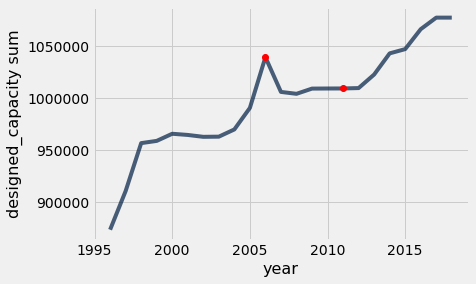

In [101]:
### We can display the change in design capacity of California's state prisons over 
### time by using the .plot function. The plot function is 
total_capacity_ca.plot("year", "designed_capacity sum")

# plt.xlabel("Year")
# plt.ylabel("Percent Occupied")
plt.plot([2011], total_capacity_ca.where("year", 2011).column("designed_capacity sum").item(0), 'ro')
plt.plot([2006], total_capacity_ca.where("year", 2006).column("designed_capacity sum").item(0), 'ro')

# Question 1?

Looking at the graph produced in the section above how does it reflect the systematic changes of the PIC? Name a court case that is represented by a red dot on the plot above.

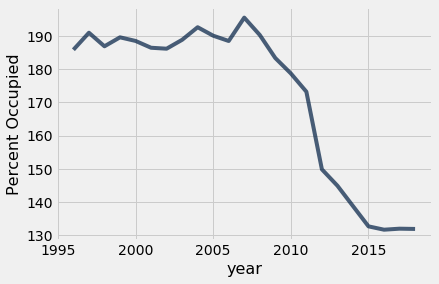

In [4]:
# idea 6: group by year?

# grouped by year to find the total prison population across the state then got rid of the month and institution names
year = data.group("year", sum).drop(1, 2)

#calculated the number of people in the prison and how that compared to the capacity it was designed for.
new_capacity = year.column("total_population sum") / year.column("designed_capacity sum") *100
year = year.with_column("Percent Occupied", new_capacity)

# plot how the there was a change in the prison population, as it got closer to its designed capacity limits.
year.plot(0, "Percent Occupied")

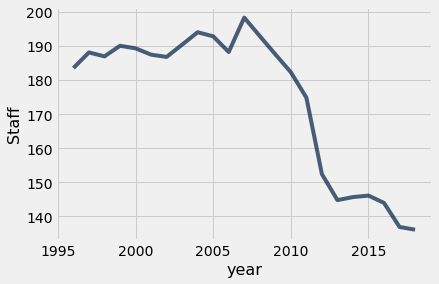

In [5]:
# idea 7: compare with staff capacity rather than designed capacity

#comparing over years
y = data.group(0, sum)
staff = y.column("staffed_capacity sum") / y.column("designed_capacity sum") *100
y = y.with_column("Staff", staff)
y.plot(0, "Staff")


# notice change in 2007??

# show how staff capacity exceeds the designed capacity

In [6]:
# idea 4: find the number of prisons per year and see if the proportion of 
# prisons that were overcrowded changed as time passed

## related to the idea that capacity increased over time

# idea 5: separating jails from prisons in data set? unclear whether they are mixed
# ALL ARE PRISONS

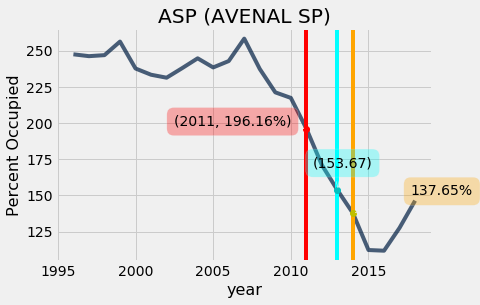

In [7]:
#populations based off the year rather than month
grouped = data.group(["institution_name", "year"], sum)

new_percents = grouped.column("total_population sum") / grouped.column("designed_capacity sum") *100
grouped = grouped.with_column("Percent Occupied", new_percents)

institutions = grouped.group(0).column(0)
institutions

inp = widgets.IntSlider(
    value=0,
    min=0,
    max=39,
    step=1,
    description='Institution:',
    orientation='horizontal',
    readout= True,
    readout_format='d'
)

def f(inp):
    inst = grouped.where(0, institutions[inp])
    inst.plot(1, "Percent Occupied")
    year1 = inst.column("year") 
    if np.any(year1 == 2011):
        plt.axvline(x=2011, color = "red")
        point1 = inst.where("year", 2011).column("Percent Occupied").item(0)
        plt.plot([2011], [point1], 'ro')
        
        plt.annotate("(2011, {0}%)".format(round(point1, 2)),
        xy=(2011, round(point1, 2)), xytext=(-15, 0),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='red', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    if np.any(year1 == 2013):
        plt.axvline(x=2013, color = "cyan")
        point2 = inst.where("year", 2013).column("Percent Occupied").item(0) 
        plt.plot([2013], [point2], 'co')
        
        plt.annotate("({0})".format(round(point2, 2)),
        xy=(2013, round(point2, 2)), xytext=(35, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='cyan', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
    if np.any(year1 == 2014):
        plt.axvline(x=2014, color = "orange")
        point3 = inst.where("year", 2014).column("Percent Occupied").item(0)
        plt.plot([2014], [point3], 'yo')
        
        plt.annotate("{0}%".format(round(point3, 2)),
        xy=(2014, round(point3, 2)), xytext=(120, 15),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='orange', alpha=0.3),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))
        
        
    plt.title(institutions[inp])
    
out = widgets.interactive_output(f, {'inp': inp})
widgets.HBox([widgets.VBox([inp]), out])
#out.clear_output()

^^ labeling options for widget:
just the y-value
coordinate with year and percent
label y-axis as percent with "%"

In [8]:
# # attempt 2 not repeating plots
# from ipywidgets import interact, interactive
# from IPython.display import clear_output, display, HTML
# w = interactive(f, inp =(0,39))
# display(w)

## Design Capacity versus Staff Capacity

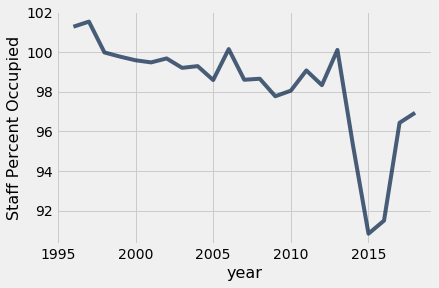

In [9]:
# idea 8: compare staff capacity with the total population; new percent occupied based off staff
s = data.group(0, sum)
staff_capacity = s.column("total_population sum") / s.column("staffed_capacity sum") *100
s = s.with_column("Staff Percent Occupied", staff_capacity)
s.plot(0, "Staff Percent Occupied")

# drastic change in staff in 2011

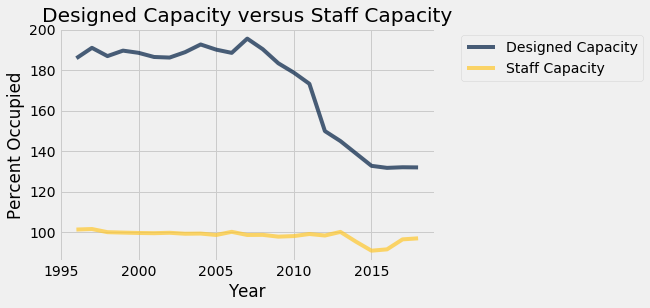

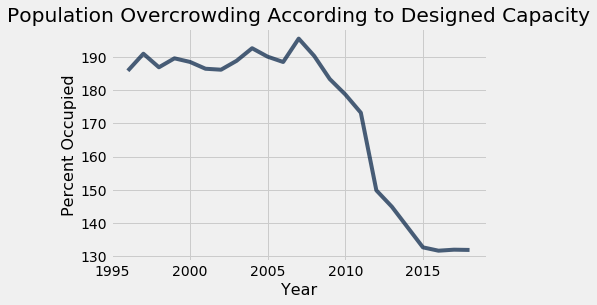

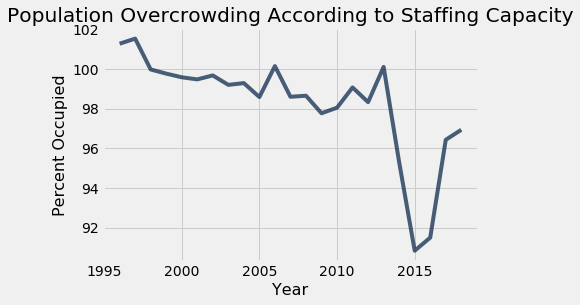

In [10]:
# grouped by year to find the total prison population across the state then got rid of the month and institution names
year = data.group("year", sum).drop(1, 2)

#calculated the number of people in the prison and how that compared to the capacity it was designed for.
new_capacity = year.column("total_population sum") / year.column("designed_capacity sum") *100
year = year.with_column("Percent Occupied", new_capacity)


s = data.group(0, sum)
staff_capacity = s.column("total_population sum") / s.column("staffed_capacity sum") *100
s = year.with_column("Staff Percent Occupied", staff_capacity)
s = s.select("year", "Percent Occupied", "Staff Percent Occupied").relabel("Percent Occupied", "Designed Capacity").relabel("Staff Percent Occupied", "Staff Capacity")

s.plot(0)
plt.title("Designed Capacity versus Staff Capacity")
plt.xlabel("Year")
plt.ylabel("Percent Occupied")


year.plot(0, "Percent Occupied")
plt.title("Population Overcrowding According to Designed Capacity")
plt.xlabel("Year")

s.plot(0, "Staff Capacity")
plt.title("Population Overcrowding According to Staffing Capacity")
plt.xlabel("Year")
plt.ylabel("Percent Occupied")


## GENDER DIVISION <a id='subsection1'></a>

**Context:** The system is reinforcing the idea that prison population are mostly male and of a certain charcater. Since we have a limited data sets we cannot investigate the racial aspect such claims. However, this dataset allows us to get a more meaningful understanding of gender divisions on prisons, in order to get a better understanding of the populations that the prison industrial complex was made to hold. 


In [11]:
# Need to come back to male-female instituions divide 
# institutions = grouped.group(0).column(0)
# (institutions)

In [12]:
data.group("institution_name").show()

institution_name,count
ASP (AVENAL SP),276
CAL (CALIPATRIA SP),276
CCC (CA CORRECTIONAL CENTER),276
CCI (CA CORRECTIONAL INSTITUTION),276
CCWF (CENTRAL CA WOMEN'S FAC),276
CEN (CENTINELA SP),276
CHCF (CA HEALTH CARE FAC - STOCKTON),66
CIM (CA INSTITUTION FOR MEN),276
CIW (CA INSTITUTION FOR WOMEN),276
CMC (CA MEN'S COLONY),276


### UNIQUE FEMALE PRISONS

In [13]:
### UNIQUE FEMALE PRISONS

# include "WOMEN" in name
wom = data.group("institution_name").where(0, are.containing("WOMEN"))
#include "FEMALE" in name
female = data.group("institution_name").where(0, are.containing("FEMALE")).row(0)

# Merge tables to get either "WOMEN" or "FEMALE"
women_prisons = wom.with_row(female)
women_prisons

# UNCOMMENT for an array of unique women's institutions but easier to read as table above ^^^
#unique_women_prisons = women_prisons.column(0)
#unique_women_prisons

# UNCOMMENT for the number of rows that are about female prisons / should match number of rows in women_data
# women_prisons.column(1).sum()

institution_name,count
CCWF (CENTRAL CA WOMEN'S FAC),276
CIW (CA INSTITUTION FOR WOMEN),276
"CRC (CAL REHAB CTR, WOMEN)",138
NCWF (NO CAL WOMEN'S FACIL),85
FOL (FOLSOM SP) (FEMALE),72


In [14]:
### DATA of FEMALE PRISONS ONLY

# Data that include "WOMEN" in name
women_data = data.where("institution_name", are.containing("WOMEN"))
# Data that include "FEMALE" in name
fem_data = data.where("institution_name", are.containing("FEMALE"))

# Merge tables to get DATA that has either "WOMEN" or "FEMALE" institutions
women_data = women_data.append(fem_data).sort("year")
women_data

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,2,NCWF (NO CAL WOMEN'S FACIL),787,1,788,400,197,760
1996,2,CCWF (CENTRAL CA WOMEN'S FAC),3171,20,3191,2004,159.2,2999
1996,2,"CRC (CAL REHAB CTR, WOMEN)",100,702,802,500,160.4,842
1996,2,CIW (CA INSTITUTION FOR WOMEN),1726,34,1760,1026,171.5,1646
1996,3,NCWF (NO CAL WOMEN'S FACIL),770,1,771,400,192.8,760
1996,3,CCWF (CENTRAL CA WOMEN'S FAC),3036,7,3043,2004,151.8,2999


### UNIQUE MALE PRISONS

In [54]:
### UNIQUE MALE PRISONS
men_prisons = data.group("institution_name").where(0, are.not_containing("WOMEN")).where(0, are.not_containing("FEMALE"))
men_prisons.take(np.arange(17)).column(0)


# UNCOMMENT for an array of unique male institutions, but easier to read as table above ^^^
# unique_male_prisons = men_prisons.column(0)
# unique_male_prisons

# UNCOMMENT for the number of rows that are about male prisons / should match number of rows in men_data
#men_prisons.column(1).sum()

array(['ASP (AVENAL SP)', 'CAL (CALIPATRIA SP)',
       'CCC (CA CORRECTIONAL CENTER)', 'CCI (CA CORRECTIONAL INSTITUTION)',
       'CEN (CENTINELA SP)', 'CHCF (CA HEALTH CARE FAC - STOCKTON)',
       'CIM (CA INSTITUTION FOR MEN)', "CMC (CA MEN'S COLONY)",
       'CMF (CA MEDICAL FAC)', 'COR (CA SP, CORCORAN)',
       'CRC (CAL REHAB CTR, MEN)', 'CTF (CORRECTIONAL TRAINING FAC)',
       'CVSP (CHUCKAWALLA VALLEY SP)',
       'DVI (DEUEL VOCATIONAL INSTITUTION)', 'FOL (FOLSOM SP) (MALE)',
       'FRCC (FRCCC BAKERSFIELD)', 'HDSP (HIGH DESERT SP)'], 
      dtype='<U36')

In [56]:
actually_female = make_array('FRCC (FRCCC BAKERSFIELD)')
actually_female

array(['FRCC (FRCCC BAKERSFIELD)'], 
      dtype='<U24')

In [63]:
### DATA of MALE PRISONS ONLY
men_data = data.where("institution_name", are.not_containing("WOMEN"))\
                .where("institution_name", are.not_containing("FEMALE"))\
                .where("institution_name", are.not_contained_in(actually_female))

men_data

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566
1996,1,PVSP (PLEASANT VALLEY SP),4080,0,4080,2208,184.8,4008
1996,1,PBSP (PELICAN BAY SP),3509,1,3510,2280,153.9,3730
1996,1,NKSP (NORTH KERN SP),4525,1,4526,2492,181.6,4472
1996,1,MCSP (MULE CREEK SP),3530,0,3530,1700,207.6,3562


### PLOTTING MALE VS FEMALE DATA

### FEMALE

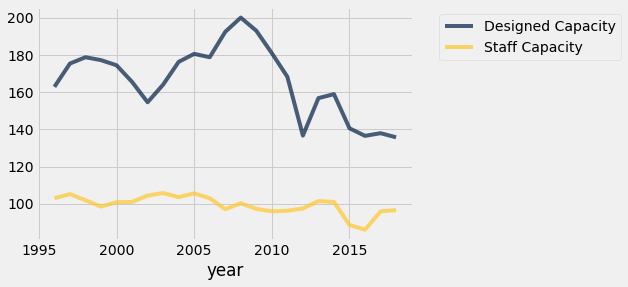

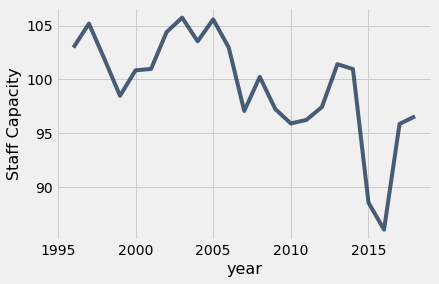

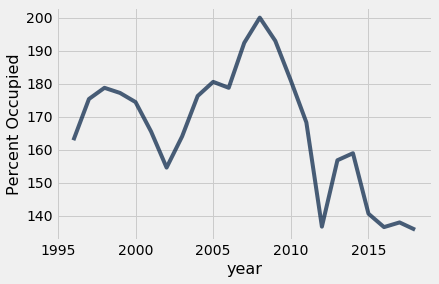

In [17]:
# FEMALE DESIGN VS STAFF
fem_year = women_data.group("year", sum).drop(1, 2)

#calculated the number of people in the prison and how that compared to the capacity it was designed for.
fem_new_capacity = fem_year.column("total_population sum") / fem_year.column("designed_capacity sum") *100
fem_year = fem_year.with_column("Percent Occupied", fem_new_capacity)


fem_s = women_data.group(0, sum)
fem_staff_capacity = fem_s.column("total_population sum") / fem_s.column("staffed_capacity sum") *100
fem_s = fem_year.with_column("Staff Percent Occupied", fem_staff_capacity)
fem_s = fem_s.select("year", "Percent Occupied", "Staff Percent Occupied").relabel("Percent Occupied", "Designed Capacity").relabel("Staff Percent Occupied", "Staff Capacity")

fem_s.plot(0)
fem_s.plot(0, "Staff Capacity")
fem_year.plot(0, "Percent Occupied")

### MALE

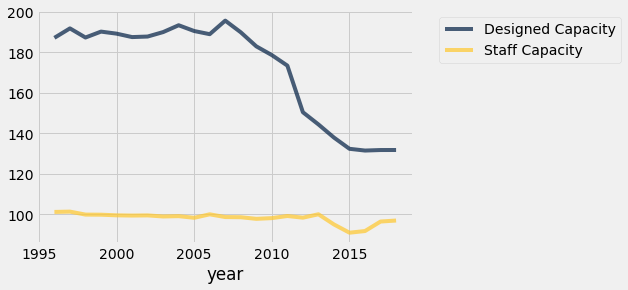

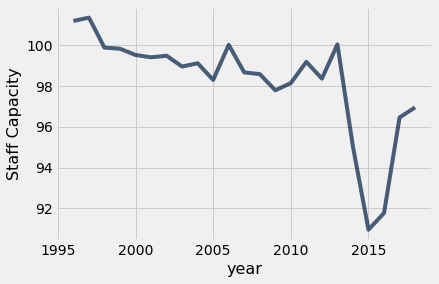

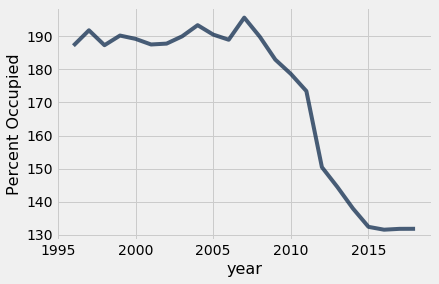

In [18]:
# MALE DESIGN VS STAFF
m_year = men_data.group("year", sum).drop(1, 2)

#calculated the number of people in the prison and how that compared to the capacity it was designed for.
m_new_capacity = m_year.column("total_population sum") / m_year.column("designed_capacity sum") *100
m_year = m_year.with_column("Percent Occupied", m_new_capacity)


m_s = men_data.group(0, sum)
m_staff_capacity = m_s.column("total_population sum") / m_s.column("staffed_capacity sum") *100
m_s = m_year.with_column("Staff Percent Occupied", m_staff_capacity)
m_s = m_s.select("year", "Percent Occupied", "Staff Percent Occupied").relabel("Percent Occupied", "Designed Capacity").relabel("Staff Percent Occupied", "Staff Capacity")

m_s.plot(0)
m_s.plot(0, "Staff Capacity")
m_year.plot(0, "Percent Occupied")

### FEMALE VS MALE with STAFF VS. DESIGN

In [19]:
male_female = m_s.join("year", fem_s).relabel("Designed Capacity_2", "Female Designed Capacity")
male_female = male_female.relabel("Staff Capacity_2", "Female Staff Capacity")
male_female = male_female.relabel("Designed Capacity", "Male Designed Capacity")
male_female = male_female.relabel("Staff Capacity", "Male Staff Capacity")

male_female

year,Male Designed Capacity,Male Staff Capacity,Female Designed Capacity,Female Staff Capacity
1996,187.172,101.199,162.856,102.961
1997,191.83,101.362,175.369,105.189
1998,187.322,99.8883,178.76,101.9
1999,190.239,99.8343,177.207,98.4868
2000,189.237,99.5279,174.436,100.85
2001,187.54,99.4132,165.507,100.979
2002,187.804,99.4891,154.559,104.404
2003,190.003,98.9586,164.027,105.746
2004,193.383,99.1223,176.275,103.544
2005,190.531,98.3048,180.568,105.581


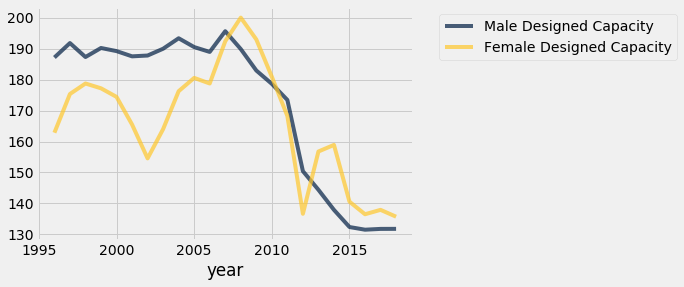

In [20]:
male_female.select(0,1,3).plot(0)

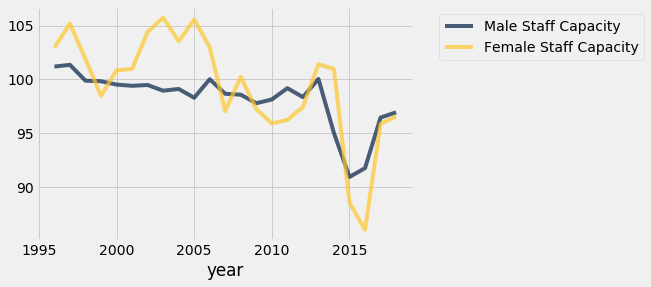

In [21]:
male_female.select(0,2,4).plot(0)

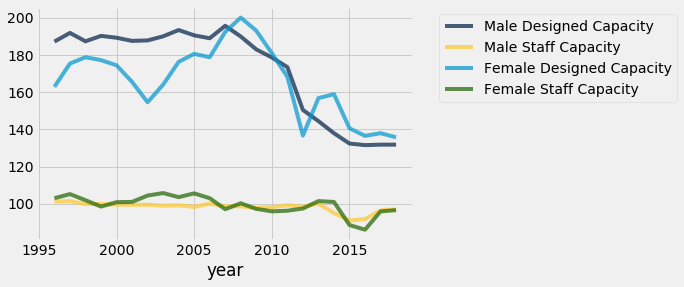

In [22]:
# MALE VS FEMALE FOR STAFF AND DESIGN
male_female.plot(0)

In [23]:
all_joined = s.join("year", male_female)
all_joined

year,Designed Capacity,Staff Capacity,Male Designed Capacity,Male Staff Capacity,Female Designed Capacity,Female Staff Capacity
1996,185.859,101.281,187.172,101.199,162.856,102.961
1997,190.978,101.537,191.83,101.362,175.369,105.189
1998,186.899,99.9814,187.322,99.8883,178.76,101.9
1999,189.598,99.7716,190.239,99.8343,177.207,98.4868
2000,188.514,99.5868,189.237,99.5279,174.436,100.85
2001,186.463,99.4802,187.54,99.4132,165.507,100.979
2002,186.176,99.6799,187.804,99.4891,154.559,104.404
2003,188.85,99.2042,190.003,98.9586,164.027,105.746
2004,192.636,99.2918,193.383,99.1223,176.275,103.544
2005,190.092,98.5895,190.531,98.3048,180.568,105.581


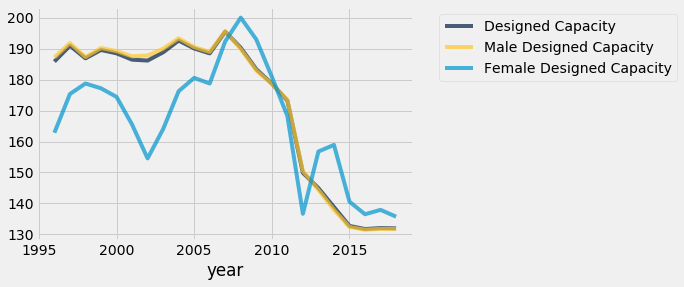

In [24]:
design_all = all_joined.select(0, 1, 3, 5)
design_all.plot(0)

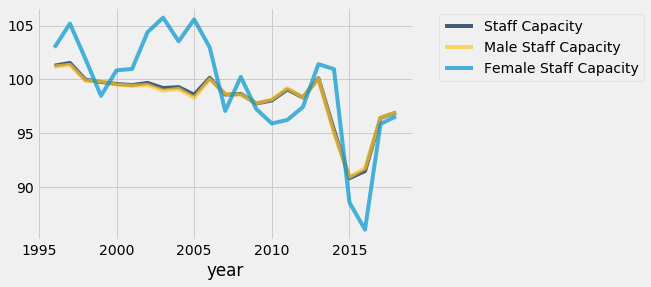

In [25]:
staff_all = all_joined.select(0, 2, 4, 6)
staff_all.plot(0)

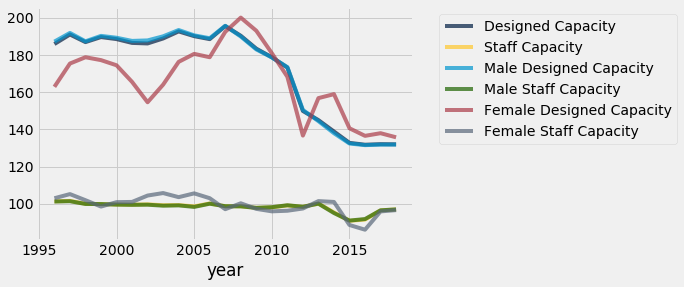

In [26]:
# ALL 6 lines
all_joined.plot(0)

### STACKED BAR CHART
###### separate civil addict and felon?
##### stacked bar chart

In [27]:
data

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,VSP (VALLEY SP),2294,0,2294,1980,115.9,1980
1996,1,SCC (SIERRA CONSERVATION CENTER),322,0,322,320,100.6,320
1996,1,NCWF (NO CAL WOMEN'S FACIL),786,4,790,400,197.5,760
1996,1,CCWF (CENTRAL CA WOMEN'S FAC),2846,13,2859,2004,142.7,3224
1996,1,"CRC (CAL REHAB CTR, WOMEN)",91,703,794,500,158.8,842
1996,1,CIW (CA INSTITUTION FOR WOMEN),1690,36,1726,1026,168.2,1646
1996,1,WSP (WASCO SP),4475,62,4537,2484,182.6,4484
1996,1,SCC (SIERRA CONSERVATION CENTER),6010,0,6010,3606,166.7,5884
1996,1,SRTA (SANTA RITA CO. JAIL-RC),811,0,811,395,205.3,750
1996,1,RJD (RJ DONOVAN CORRECTIONAL FAC),4577,0,4577,2200,208,4566


In [28]:
change_by_year = data.group(["institution_name", "year"], sum)
civi_inst = change_by_year.where(0, institutions[0]) 
civi_inst

institution_name,year,month sum,population_felons sum,civil_addict sum,total_population sum,designed_capacity sum,percent_occupied sum,staffed_capacity sum
ASP (AVENAL SP),1996,78,68896,0,68896,27840,2969.8,69516
ASP (AVENAL SP),1997,78,68539,0,68539,27840,2954.4,69516
ASP (AVENAL SP),1998,78,68734,0,68734,27840,2962.6,69516
ASP (AVENAL SP),1999,78,72369,0,72369,28240,3078.2,70316
ASP (AVENAL SP),2000,78,79711,1,79712,33540,2852.6,80820
ASP (AVENAL SP),2001,78,81769,0,81769,35040,2800.4,83136
ASP (AVENAL SP),2002,78,81052,0,81052,35040,2775.9,80136
ASP (AVENAL SP),2003,78,83359,0,83359,35040,2854.8,81786
ASP (AVENAL SP),2004,78,85742,0,85742,35040,2936.4,85086
ASP (AVENAL SP),2005,78,84463,0,84463,35428,2861.7,84336


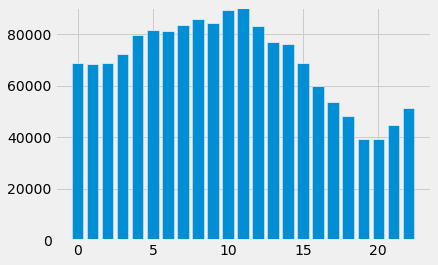

In [29]:
# 1st institution trial; larger proportion of pop felon

N = civi_inst.num_rows
civil_add = civi_inst.column("civil_addict sum")
pop_felon = civi_inst.column("population_felons sum")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, pop_felon, width)
p2 = plt.bar(ind, civil_add, width, bottom=pop_felon)

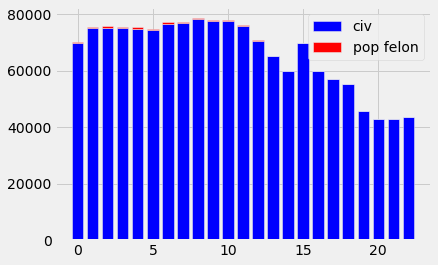

In [30]:
# 2nd institution trial; larger proportion of pop felon
change_by_year2 = data.group(["institution_name", "year"], sum)
civi_inst2 = change_by_year2.where(0, "CIM (CA INSTITUTION FOR MEN)") 

N = civi_inst2.num_rows
civil_add2 = civi_inst2.column("civil_addict sum")
pop_felon2 = civi_inst2.column("population_felons sum")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, pop_felon2, width, color='b')
p2 = plt.bar(ind, civil_add2, width, bottom = pop_felon2, color='r')
plt.legend((p1[0], p2[0]), ('civ', 'pop felon'))

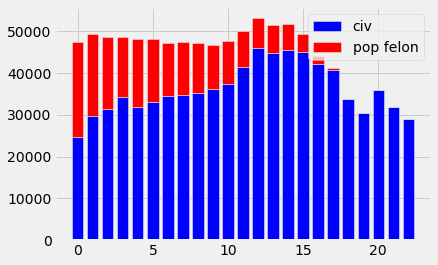

In [31]:
# 3rd institution trial; larger proportion of pop felon

change_by_year3 = data.group(["institution_name", "year"], sum)
civi_inst3 = change_by_year3.where(0, "CRC (CAL REHAB CTR, MEN)") 

N = civi_inst3.num_rows
civil_add3 = civi_inst3.column("civil_addict sum")
pop_felon3 = civi_inst3.column("population_felons sum")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, pop_felon3, width, color='b')
p2 = plt.bar(ind, civil_add3, width, bottom = pop_felon3, color='r')
plt.legend((p1[0], p2[0]), ('civ', 'pop felon'))

In [32]:
month_civi = data.where("institution_name", "CRC (CAL REHAB CTR, MEN)").where("year", 1996) 
month_civi

year,month,institution_name,population_felons,civil_addict,total_population,designed_capacity,percent_occupied,staffed_capacity
1996,1,"CRC (CAL REHAB CTR, MEN)",1776,2201,3977,1814,219.2,3906
1996,2,"CRC (CAL REHAB CTR, MEN)",1684,2164,3848,1814,212.1,3906
1996,3,"CRC (CAL REHAB CTR, MEN)",1809,2193,4002,1814,220.6,3906
1996,4,"CRC (CAL REHAB CTR, MEN)",1834,2118,3952,1814,217.9,3906
1996,5,"CRC (CAL REHAB CTR, MEN)",1740,2032,3772,1814,207.9,3906
1996,6,"CRC (CAL REHAB CTR, MEN)",2062,1899,3961,1814,218.4,3906
1996,7,"CRC (CAL REHAB CTR, MEN)",2171,1797,3968,1814,218.7,3906
1996,8,"CRC (CAL REHAB CTR, MEN)",2263,1743,4006,1814,220.8,3906
1996,9,"CRC (CAL REHAB CTR, MEN)",2310,1751,4061,1814,223.9,3906
1996,10,"CRC (CAL REHAB CTR, MEN)",2309,1707,4016,1814,221.4,3906


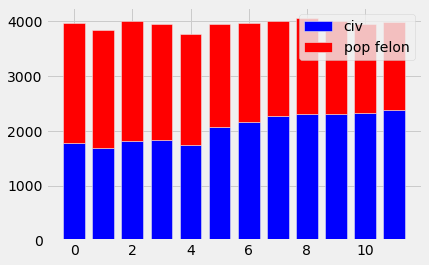

In [33]:
# monthly trial with 3rd institution used above 
# 1996 pop by month for CRC (CAL REHAB CTR, MEN)
N = month_civi.num_rows
m_civil = month_civi.column("civil_addict")
m_pop_felon = month_civi.column("population_felons")
width = 0.75
ind = np.arange(N)

p1 = plt.bar(ind, m_pop_felon, width, color='b')
p2 = plt.bar(ind, m_civil, width, bottom = m_pop_felon, color='r')
plt.legend((p1[0], p2[0]), ('civ', 'pop felon'))

## ISSUE WITH STACKED BAR CHART HARD TO SEE THE DIFFERENCE BETWEEN GROUPS

In [34]:
proportion_civi = change_by_year.column("civil_addict sum") / change_by_year.column("total_population sum")
change_by_civi = change_by_year.with_column("Proportion of civil addicts", proportion_civi)
change_by_civi

# both_c_f = change_by_civi.where("Proportion of civil addicts", are.above(0.0001))
# both_c_f.group("institution_name").show()

institution_name,year,month sum,population_felons sum,civil_addict sum,total_population sum,designed_capacity sum,percent_occupied sum,staffed_capacity sum,Proportion of civil addicts
ASP (AVENAL SP),1996,78,68896,0,68896,27840,2969.8,69516,0
ASP (AVENAL SP),1997,78,68539,0,68539,27840,2954.4,69516,0
ASP (AVENAL SP),1998,78,68734,0,68734,27840,2962.6,69516,0
ASP (AVENAL SP),1999,78,72369,0,72369,28240,3078.2,70316,0
ASP (AVENAL SP),2000,78,79711,1,79712,33540,2852.6,80820,1.25452e-05
ASP (AVENAL SP),2001,78,81769,0,81769,35040,2800.4,83136,0
ASP (AVENAL SP),2002,78,81052,0,81052,35040,2775.9,80136,0
ASP (AVENAL SP),2003,78,83359,0,83359,35040,2854.8,81786,0
ASP (AVENAL SP),2004,78,85742,0,85742,35040,2936.4,85086,0
ASP (AVENAL SP),2005,78,84463,0,84463,35428,2861.7,84336,0


In [35]:
institutions[12]

'CRC (CAL REHAB CTR, MEN)'

# ATTEMPT WIDGET FOR CIVIL ADDICTS OVER TIME

In [36]:
def month_c(index):
    
    month_civi = data.where("institution_name", institutions[index])
    time = month_civi.column("year")
    def plotti(tbl, i):
        month_civi = tbl.where("year", i) 
        N = month_civi.num_rows
        m_civil = month_civi.column("civil_addict")
        m_pop_felon = month_civi.column("population_felons")
        width = 0.75
        ind = np.arange(N)

        p1 = plt.bar(ind, m_pop_felon, width, color='b')
        p2 = plt.bar(ind, m_civil, width, bottom = m_pop_felon, color='r')
        plt.legend((p1[0], p2[0]), ('civil addict', 'population felon'))
        plt.title(institutions[index])
        
    return plotti(month_civi, time[0])
#     if len(time) > 4:
#         plt.close('all')
#         fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2)
#         ax1 = plotti(month_civi, time[0])
#         print(1)
#         ax2 = plotti(month_civi, time[1])
#         print(2)
# #         ax3 = plotti(month_civi, time[2])
# #         ax4 = plotti(month_civi, time[3])
#         #plt.tight_layout()

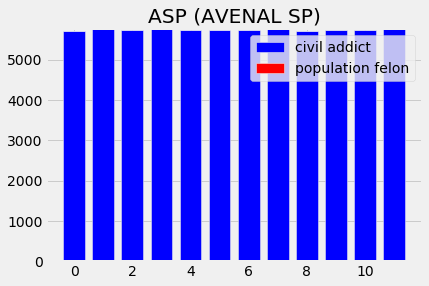

In [37]:
month_c(0)

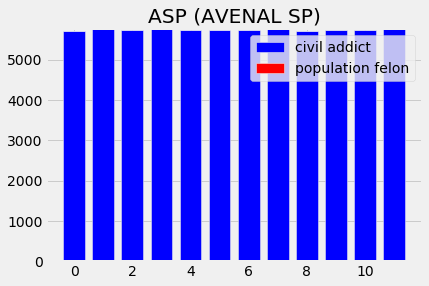

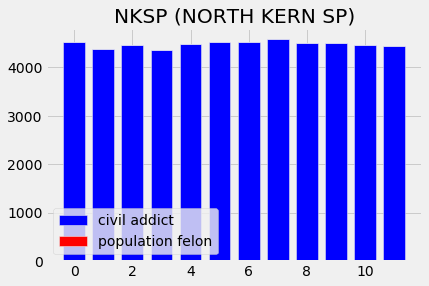

In [38]:
index_inp = widgets.IntSlider(
    value=0,
    min=0,
    max=39,
    step=1,
    description='Institution:',
    orientation='horizontal',
    readout= True,
    readout_format='d'
)

index_inp
out = widgets.interactive_output(month_c, {'index': index_inp})
widgets.HBox([widgets.VBox([index_inp]), out])

In [39]:
## issue with years not all start at the same time

### CIVIL ADDICTS OVER TIME??

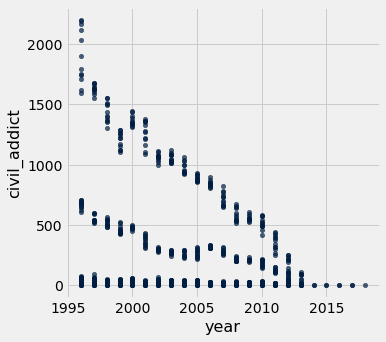

In [40]:
civi = data.group(["civil_addict", "year"])
civi.drop(2).scatter(1)